In [1]:
%load_ext autoreload
%autoreload 2

import gc

# import io
import pickle

# import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import torch
import tqdm
import yaml

# from PIL import Image, ImageFilter
from torchvision import transforms
from torchvision.utils import save_image

import patcher

sys.path.append("../")


def build_transform(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)):
    t = [
        transforms.Normalize(mean, std),
    ]
    return transforms.Compose(t)


transforming = build_transform()


def clear_gpu() -> None:
    torch.clear_autocast_cache()
    torch.cuda.ipc_collect()
    torch.cuda.empty_cache()
    gc.collect()


def plot_training(losses, title="Loss over time"):
    # clear_output(wait=True)
    plt.plot(losses)
    plt.title(title)
    plt.xlabel("Step")
    plt.ylabel("Loss")
    plt.show()


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gen = torch.Generator()
gen.manual_seed(0)


def dump_to_pickle(data, file_path: str):
    try:
        with open(file_path, "wb") as file:
            pickle.dump(data, file)
        print(f"Data successfully dumped to {file_path}")
    except Exception as e:
        print(f"An error occurred while dumping data: {e}")


def load_from_pickle(file_path: str):
    try:
        with open(file_path, "rb") as file:
            data = pickle.load(file)
        print(f"Data successfully loaded from {file_path}")
        return data
    except Exception as e:
        print(f"An error occurred while loading data: {e}")
        return None


def display(image: torch.Tensor):
    # Convert the tensor to a numpy array and transpose it to [H, W, C]
    image_np = image.permute(1, 2, 0).numpy()

    # Display the image using matplotlib
    plt.imshow(image_np)
    plt.axis("off")  # Hide the axis
    plt.show()


# img_frs_seq = load_from_pickle("img_frs_seq.pkl")[:10]
# msk_frs_seq = load_from_pickle("msk_frs_seq.pkl")[:10]
# stylized = load_from_pickle("stylized.pkl")[:10]
# memo_flows_fwd = load_from_pickle("memo_flows_fwd.pkl")[:10]
# memo_flows_bwd = load_from_pickle("memo_flows_bwd.pkl")[:10]

img_frs_ts = load_from_pickle("img_frs_ts.pkl")
stl_frs_ts = load_from_pickle("stl_frs_ts.pkl")
# msk_frs_ts = load_from_pickle("msk_frs_ts.pkl")
# stl_frames = torch.cat(
#     [
#         stl_frs_ts[0].unsqueeze(0),
#         stl_frs_ts[5].unsqueeze(0),
#         stl_frs_ts[11].unsqueeze(0),
#     ]
# )

j:\AI\ComfyUI_windows_portable\python_embeded\Lib\site-packages\transformers\utils\hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


Data successfully loaded from img_frs_ts.pkl
Data successfully loaded from stl_frs_ts.pkl


In [4]:
# img_frs_seq = load_from_pickle("img_frs_seq.pkl")
# msk_frs_seq = load_from_pickle("msk_frs_seq.pkl")
# stylized = load_from_pickle("stylized.pkl")

# img_frs_ts = patcher.np_to_tensor(img_frs_seq)
# stl_frs_ts = patcher.np_to_tensor(stylized)
# msk_frs_ts = patcher.np_msk_to_tensor(msk_frs_seq)
# dump_to_pickle(img_frs_ts, "img_frs_ts.pkl")
# dump_to_pickle(stl_frs_ts, "stl_frs_ts.pkl")
# dump_to_pickle(msk_frs_ts, "msk_frs_ts.pkl")

# img_frs_ts = load_from_pickle("img_frs_ts.pkl")[:12]
# stl_frs_ts = load_from_pickle("stl_frs_ts.pkl")[:12]
# # msk_frs_ts = load_from_pickle("msk_frs_ts.pkl")
# stl_frames = torch.cat(
#     [
#         stl_frs_ts[0].unsqueeze(0),
#         stl_frs_ts[5].unsqueeze(0),
#         stl_frs_ts[11].unsqueeze(0),
#     ]
# )


Data successfully loaded from img_frs_seq.pkl
Data successfully loaded from msk_frs_seq.pkl
Data successfully loaded from stylized.pkl
Data successfully dumped to img_frs_ts.pkl
Data successfully dumped to stl_frs_ts.pkl
Data successfully dumped to msk_frs_ts.pkl
Data successfully loaded from img_frs_ts.pkl
Data successfully loaded from stl_frs_ts.pkl


In [2]:
cfg_path = "J:/AI/sanct/PatchBased-StyleTransfer/config/reference_P.yaml"
with open(cfg_path, "r") as f:
    job_description = yaml.full_load(f)

(
    generator,
    opt_generator,
    discriminator,
    opt_discriminator,
    perception_loss_model,
    perception_loss_weight,
    reconstruction_criterion,
    adversarial_criterion,
) = patcher.init_model(job_description, device)

In [9]:
clear_gpu()

In [3]:
stl_frames = torch.cat(
    [
        stl_frs_ts[0].unsqueeze(0),
        # stl_frs_ts[11].unsqueeze(0),
    ]
)

last_g_losses, last_d_losses = patcher.train(
    org_frames=img_frs_ts.float(),
    stl_frames=stl_frames.float(),
    stl_indices=[0],
    generator=generator,
    opt_generator=opt_generator,
    discriminator=discriminator,
    opt_discriminator=opt_discriminator,
    perception_loss_model=perception_loss_model,
    reconstruction_criterion=reconstruction_criterion,
    adversarial_criterion=adversarial_criterion,
    device=device,
    num_epochs=1000,
    batch_size=64,
    patch_size=64,
    # patch_size=36,
    add_rand_noise=False,
    # add_rand_noise=True,
    rand_noise_wgt=0.001,
    use_adversarial_loss=True,
)
# Training epoch [999] G[0.39174] D[0.48954]: 100%|| 1000/1000 [11:51<00:00,  1.41it/s] # ?
# Training epoch [999] G[0.65515] D[0.48677]: 100%|| 1000/1000 [11:42<00:00,  1.42it/s] # AMP Sigmoid p=36 noised
# Training epoch [999] G[1.11404] D[0.46957]: 100%|| 1000/1000 [11:46<00:00,  1.42it/s] # AMP Tanh Transform p=36 noised
# Training epoch [999] G[0.64944] D[0.48329]: 100%|| 1000/1000 [11:33<00:00,  1.44it/s] # AMP Tanh p=36 noised
# Training epoch [999] G[0.54750] D[0.49724]: 100%|| 1000/1000 [07:10<00:00,  2.32it/s] # AMP Tanh p=64 no noise
# Training epoch [999] G[0.51439] D[0.49756]: 100%|| 1000/1000 [06:54<00:00,  2.41it/s] # AMP Sigmoid p64 b64 no noise

## Best so far (visually): AMP Sigmoid p64 b64 no noise spectral norm
# Training epoch [999] G[0.54267] D[0.49353]: 100%|| 1000/1000 [07:01<00:00,  2.37it/s]

## Best + D Spectral norm + D Self Attn (Best)
# Training epoch [999] G[0.52791] D[0.49906]: 100%|| 1000/1000 [07:17<00:00,  2.29it/s]
# Training epoch [999] G[0.46876] D[0.49533]: 100%|| 1000/1000 [07:26<00:00,  2.24it/s]

## Best + D Spectral norm + VGG19 (Not as good)
# Training epoch [999] G[0.59615] D[0.49126]: 100%|| 1000/1000 [08:07<00:00,  2.05it/s]

## Best + D Spectral norm
# Training epoch [999] G[0.52599] D[0.49451]: 100%|| 1000/1000 [07:10<00:00,  2.32it/s]

Training epoch [999] G[0.52599] D[0.49451]: 100%|██████████| 1000/1000 [07:10<00:00,  2.32it/s]


In [ ]:
# Training epoch [99] G[1.05758] D[0.47977]: 100%|| 100/100 [01:51<00:00,  1.12s/it] # Use Discrim
# Training epoch [99] G[0.87836] D[nan]: 100%|| 100/100 [00:54<00:00,  1.84it/s] # No Discrim, worse

## VGG
# Training epoch [99] G[0.93207] D[0.41499]: 100%|| 100/100 [01:54<00:00,  1.14s/it] # VGG
# Training epoch [99] G[0.78764] D[0.45386]: 100%|| 100/100 [01:58<00:00,  1.19s/it]

## AdamW
# Training epoch [99] G[1.07432] D[0.46752]: 100%|| 100/100 [01:51<00:00,  1.11s/it]

## Autocast
# Training epoch [99] G[1.15674] D[0.46419]: 100%|| 100/100 [01:15<00:00,  1.33it/s]
# Training epoch [99] G[1.04120] D[0.46573]: 100%|| 100/100 [01:13<00:00,  1.37it/s]
# Training epoch [99] G[0.92599] D[0.47774]: 100%|| 100/100 [01:24<00:00,  1.19it/s]
# Training epoch [99] G[0.83127] D[0.47726]: 100%|| 100/100 [01:10<00:00,  1.42it/s]

In [ ]:
# -------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------
#                                                    Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg    # of Calls
# -------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------
#                                         model_inference        39.65%        3.818s        73.05%        7.034s        7.034s        3.596s        34.45%        6.960s        6.960s             1
#                                            aten::conv2d         1.51%     145.534ms        14.98%        1.443s     203.792us      39.784ms         0.38%        2.520s     355.925us          7080
# autograd::engine::evaluate_function: ConvolutionBack...         1.26%     120.946ms        10.54%        1.015s     252.520us      34.287ms         0.33%        2.411s     599.669us          4020
#                                    ConvolutionBackward0         0.50%      47.937ms         8.25%     794.149ms     197.550us      15.752ms         0.15%        2.305s     573.438us          4020
#                              aten::convolution_backward         6.03%     580.553ms         7.75%     746.212ms     185.625us        2.046s        19.60%        2.289s     569.519us          4020
#                                       aten::convolution         0.82%      78.728ms         6.64%     639.487ms     144.029us      18.691ms         0.18%        1.366s     307.637us          4440
#                                      aten::_convolution         1.75%     168.128ms         5.82%     560.759ms     126.297us      37.914ms         0.36%        1.347s     303.428us          4440
#                                 aten::cudnn_convolution         2.91%     279.977ms         2.91%     279.977ms      63.058us        1.117s        10.70%        1.117s     251.679us          4440
#                                                aten::to         1.39%     133.640ms         7.66%     737.601ms      38.113us      83.080ms         0.80%     576.378ms      29.782us         19353
#                                              aten::item         0.84%      81.115ms         6.71%     646.279ms      69.418us      37.676ms         0.36%     551.360ms      59.222us          9310
# -------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------
# Self CPU time total: 9.630s
# Self CUDA time total: 10.439s


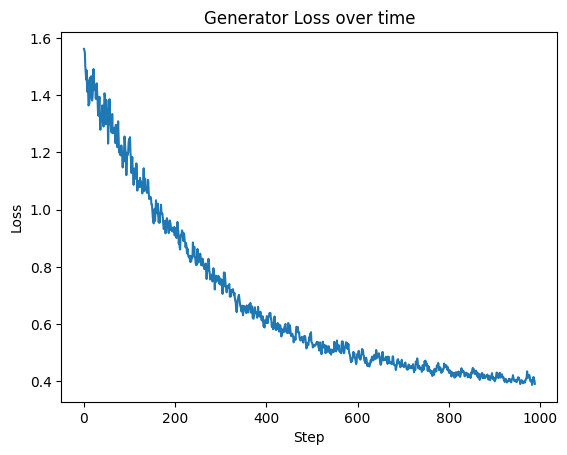

In [8]:
plot_training(last_g_losses[10:], "Generator Loss over time")

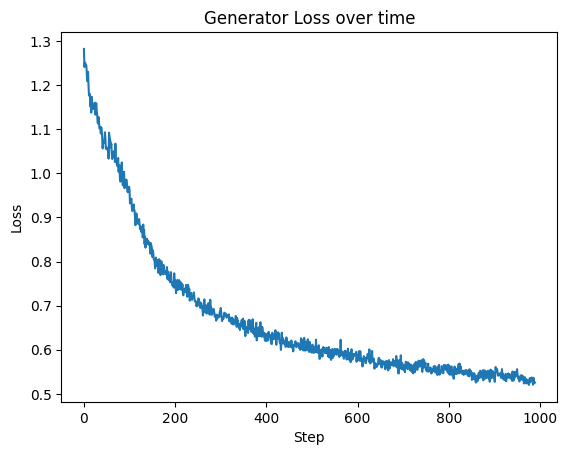

In [4]:
plot_training(last_g_losses[10:], "Generator Loss over time")

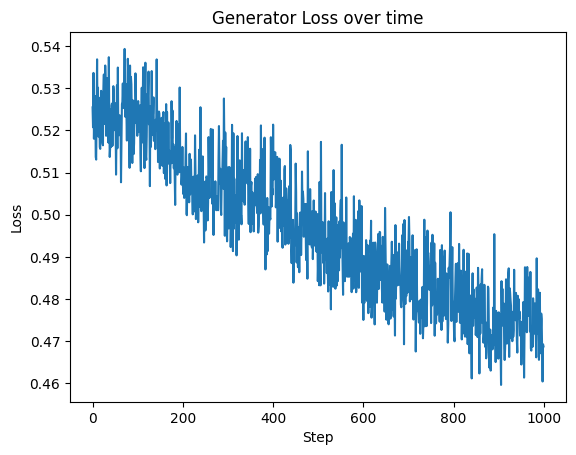

In [11]:
plot_training(last_g_losses, "Generator Loss over time")

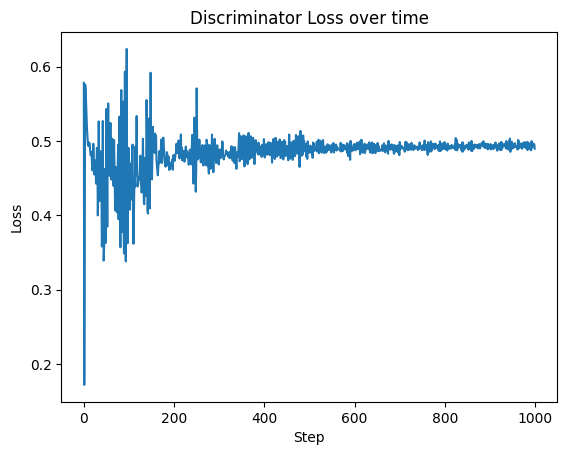

In [10]:
plot_training(last_d_losses, "Discriminator Loss over time")

In [13]:
import os

In [14]:
def save_models(
    generator,
    opt_generator,
    discriminator,
    opt_discriminator,
    perception_loss_model,
    save_path,
    epoch,
):
    # Create the directory if it doesn't exist
    os.makedirs(save_path, exist_ok=True)

    # Prepare the dictionary to save
    save_dict = {
        "epoch": epoch,
        "generator_state_dict": generator.state_dict(),
        "opt_generator_state_dict": opt_generator.state_dict(),
        "discriminator_state_dict": discriminator.state_dict(),
        "opt_discriminator_state_dict": opt_discriminator.state_dict(),
    }

    # Save the perception loss model if it's not the same as the discriminator
    if perception_loss_model is not discriminator:
        save_dict["perception_loss_model_state_dict"] = (
            perception_loss_model.state_dict()
        )

    # Save the dictionary to a file
    torch.save(
        save_dict,
        os.path.join(save_path, f"models_epoch_{epoch}.pth"),
    )


def load_models(
    generator,
    opt_generator,
    discriminator,
    opt_discriminator,
    perception_loss_model,
    load_path,
    device,
):
    """
    Load the models and optimizers from a single file.

    Args:
        generator (torch.nn.Module): The generator model.
        opt_generator (torch.optim.Optimizer): The optimizer for the generator.
        discriminator (torch.nn.Module): The discriminator model.
        opt_discriminator (torch.optim.Optimizer): The optimizer for the discriminator.
        perception_loss_model (torch.nn.Module): The perception loss model.
        load_path (str): The path where the models are saved.
        device (torch.device): The device to load the models onto.

    Returns:
        int: The epoch number loaded from the file.
    """
    # Load the dictionary from the file
    load_dict = torch.load(load_path, map_location=device)

    # Load the state dictionaries into the models and optimizers
    generator.load_state_dict(load_dict["generator_state_dict"])
    opt_generator.load_state_dict(load_dict["opt_generator_state_dict"])
    discriminator.load_state_dict(load_dict["discriminator_state_dict"])
    opt_discriminator.load_state_dict(load_dict["opt_discriminator_state_dict"])

    # Load the perception loss model if it's not the same as the discriminator
    if "perception_loss_model_state_dict" in load_dict:
        perception_loss_model.load_state_dict(
            load_dict["perception_loss_model_state_dict"]
        )

    # Return the epoch number
    return load_dict["epoch"]

In [15]:
save_models(
    generator,
    opt_generator,
    discriminator,
    opt_discriminator,
    perception_loss_model,
    "checkpoints",
    1000,
)

In [15]:
clear_gpu()

In [30]:
def invert_normalization(tensor, mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)):
    mean = torch.tensor(mean).view(1, 3, 1, 1)
    std = torch.tensor(std).view(1, 3, 1, 1)
    return tensor * std + mean

In [5]:
clear_gpu()
out_full = generator.forward(img_frs_ts[1].float().unsqueeze(0).to(device))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5009295..0.9999897].


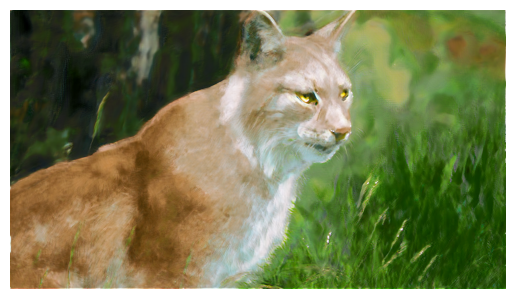

In [6]:
display(out_full.squeeze().detach().cpu())

In [6]:
print(out_full.max())
print(out_full.min())

tensor(0.9986, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.0002, device='cuda:0', grad_fn=<MinBackward1>)


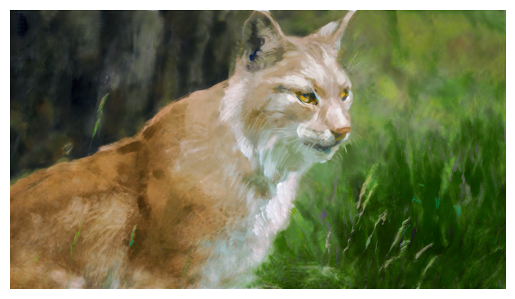

In [7]:
display(out_full.squeeze().detach().cpu())

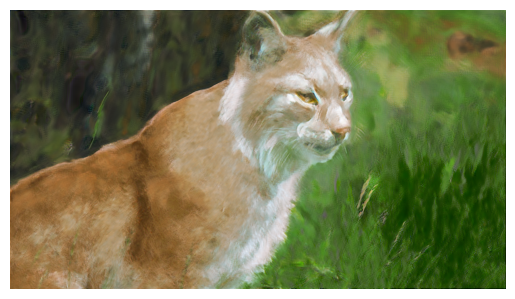

In [5]:
display(out_full.squeeze().detach().cpu())

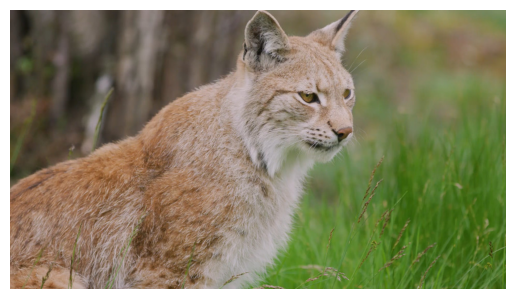

In [18]:
display(img_frs_ts[0].squeeze().detach().cpu())

In [25]:
clear_gpu()

In [8]:
out_full_list = []
clear_gpu()
with torch.no_grad():
    for img in tqdm.tqdm(img_frs_ts, total=img_frs_ts.shape[0]):
        out_full = generator.forward(img.float().unsqueeze(0).to(device))
        out_full_list.append(out_full.squeeze(0))
clear_gpu()

100%|██████████| 100/100 [00:15<00:00,  6.58it/s]


In [20]:
out_full_list[0].shape

torch.Size([3, 540, 960])

In [26]:
i = 100
print(f"{i:05d}")

00100


In [9]:
for i, tensor in tqdm.tqdm(enumerate(out_full_list), total=len(out_full_list)):
    save_image(tensor, f"output_13/image_{i:05d}.png")

100%|██████████| 100/100 [00:26<00:00,  3.71it/s]


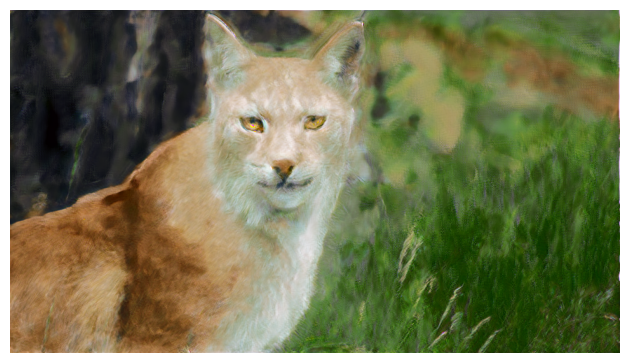

In [17]:
import matplotlib.animation as animation
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from IPython.display import HTML

frames = []  # for storing the generated images
fig, ax = plt.subplots()
ax.axis("off")  # Disable axes
for i in range(len(out_full_list)):
    frames.append(
        [
            ax.imshow(
                np.clip(
                    out_full_list[i].squeeze().detach().cpu().permute(1, 2, 0).numpy(),
                    0.0,
                    1.0,
                ),
                cmap=cm.Greys_r,
                animated=True,
            )
        ]
    )
plt.tight_layout()
ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True, repeat_delay=1000)
ani.save("movie_100_noise.mp4")

# HTML(ani.to_jshtml())

In [ ]:
HTML(ani.to_jshtml())